In [1]:
from cpwprop import *
from helprop import *
import matplotlib.pyplot as plt 
from scipy.constants import c
%matplotlib inline

### Copper PCB CPW

In [7]:
mCPW = CPWResonator(length                = [7153E-6],
                    conductorWidth        = [30E-3],
                    gapWidth              = [19E-3],
                    conductorThickness    = [1E-3],
                    resonatorType         = 'quarter',
                    conductorMaterial     = 'Copper',
                    substrateMaterial     = 'ArlonAD1000',
                    temperature           = [3],
                    couplingCapacitance   = [10E-15],
                    loadBoundaryCondition = 'Short',
                    mode                  = [3])

mCPW.characteristicImpedance()

array([56.5124598+0.j])

## Default values

In [10]:
default = {'length':                [7153E-6],
           'conductorWidth':        [20E-6],
           'gapWidth':              [10E-6],
           'conductorThickness':    [100E-9],
           'resonatorType':         'quarter',
           'conductorMaterial':     'Niobium Nitride',
           'substrateMaterial':     'Silicon',
           'temperature':           [3],
           'couplingCapacitance':   [10E-15],
           'loadBoundaryCondition': 'Short',
           'mode':                  [1]}  

## Multi-value parameters

### Uncoupled fundamental resonant frequency as a function of resonator length

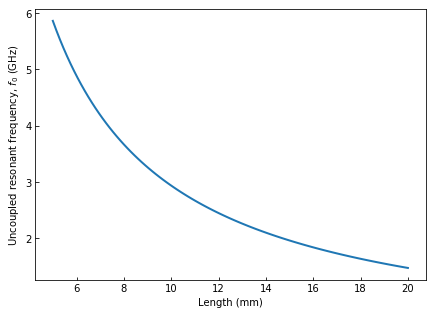

In [11]:
minLen = 5E-3
maxLen = 20E-3
length = np.linspace(minLen, maxLen, 101)

mCPW = CPWResonator(length                = length, 
                    conductorWidth        = default['conductorWidth'], 
                    gapWidth              = default['gapWidth'], 
                    conductorThickness    = default['conductorThickness'],
                    resonatorType         = default['resonatorType'], 
                    conductorMaterial     = default['conductorMaterial'], 
                    substrateMaterial     = default['substrateMaterial'],
                    temperature           = default['temperature'], 
                    couplingCapacitance   = default['couplingCapacitance'], 
                    loadBoundaryCondition = default['loadBoundaryCondition'], 
                    mode                  = default['mode'])

plt.figure(figsize=(7,5))
plt.gca().tick_params(direction='in')
plt.plot(length*10**3, mCPW.uncoupledResonantFrequency() / 10**9, '-', color='tab:blue', lw=2)
plt.xlabel('Length (mm)')
plt.ylabel('Uncoupled resonant frequency, $f_0$ (GHz)') 
#plt.savefig('length-frequency.pdf')

### Uncoupled fundamental resonant frequency as a function of temperature

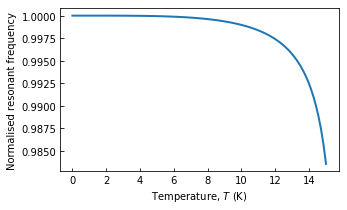

In [12]:
minTemp = 0
maxTemp = 15
temperature = np.linspace(minTemp, maxTemp,101)

mCPW = CPWResonator(length                = default['length'], 
                    conductorWidth        = default['conductorWidth'], 
                    gapWidth              = default['gapWidth'], 
                    conductorThickness    = default['conductorThickness'],
                    resonatorType         = default['resonatorType'], 
                    conductorMaterial     = default['conductorMaterial'], 
                    substrateMaterial     = default['substrateMaterial'],
                    temperature           = temperature, 
                    couplingCapacitance   = default['couplingCapacitance'], 
                    loadBoundaryCondition = default['loadBoundaryCondition'], 
                    mode                  = default['mode'])

plt.figure(figsize=(5,3))
plt.gca().tick_params(direction='in')
norm_freq = (mCPW.uncoupledResonantFrequency() / np.max(mCPW.uncoupledResonantFrequency()))
abs_freq  = mCPW.uncoupledResonantFrequency() / 10**9
plt.plot(temperature, norm_freq, '-', color='tab:blue', lw=2)
plt.xlabel('Temperature, $T$ (K)')
plt.ylabel('Normalised resonant frequency') 
#plt.savefig('temperature-frequency.pdf')

### Coupled resonant frequency as a function of coupling capacitance

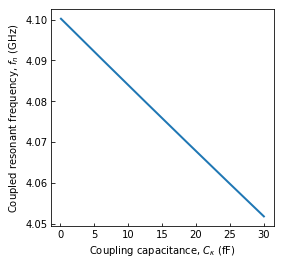

In [13]:
minCap = 0.1E-15
maxCap = 30E-15
couplingCapacitance = np.linspace(minCap, maxCap, 1001)

mCPW = CPWResonator(length                = default['length'], 
                    conductorWidth        = default['conductorWidth'], 
                    gapWidth              = default['gapWidth'], 
                    conductorThickness    = default['conductorThickness'],
                    resonatorType         = default['resonatorType'], 
                    conductorMaterial     = default['conductorMaterial'], 
                    substrateMaterial     = default['substrateMaterial'],
                    temperature           = default['temperature'], 
                    couplingCapacitance   = couplingCapacitance, 
                    loadBoundaryCondition = default['loadBoundaryCondition'], 
                    mode                  = default['mode'])

plt.figure(figsize=(4,4))
plt.gca().tick_params(direction='in')
plt.plot(couplingCapacitance* 10**15, mCPW.coupledResonantFrequency() / 10**9, color='tab:blue', lw=2)
plt.xlabel('Coupling capacitance, $C_{\kappa}$ (fF)')
plt.ylabel('Coupled resonant frequency, $f_n$ (GHz)') 
#plt.savefig('couplingCapacitance-frequency.pdf')

### Loaded quality factor and insertion loss as a function of coupling capacitance

/Users/alexmorgan/anaconda/lib/python3.6/site-packages/matplotlib/axes/_base.py:3449: UserWarning: Attempted to set non-positive ylimits for log-scale axis; invalid limits will be ignored.
  'Attempted to set non-positive ylimits for log-scale axis; '


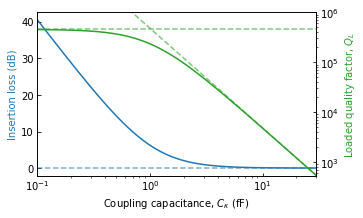

In [14]:
minCap = 0.1E-15
maxCap = 30E-15
couplingCapacitance = np.linspace(minCap, maxCap, 1001)

mCPW = CPWResonator(length                = default['length'], 
                    conductorWidth        = default['conductorWidth'], 
                    gapWidth              = default['gapWidth'], 
                    conductorThickness    = default['conductorThickness'],
                    resonatorType         = default['resonatorType'], 
                    conductorMaterial     = default['conductorMaterial'], 
                    substrateMaterial     = default['substrateMaterial'],
                    temperature           = default['temperature'], 
                    couplingCapacitance   = couplingCapacitance, 
                    loadBoundaryCondition = default['loadBoundaryCondition'], 
                    mode                  = default['mode'])

fig, ax1 = plt.subplots(figsize=(5,3))
fig.gca().tick_params(direction='in')
n = np.size(couplingCapacitance)
internalQualityFactor = [mCPW.internalQualityFactor()]*n
externalQualityFactor = mCPW.externalQualityFactor()
ax2 = ax1.twinx()
ax2.plot(couplingCapacitance* 10**15, internalQualityFactor, '--', label="$Q_{int}$", alpha=0.6, color='tab:green')
ax2.plot(couplingCapacitance* 10**15, mCPW.externalQualityFactor(), '--', label="$Q_{ext}$", alpha=0.6, color='tab:green')
ax1.plot(couplingCapacitance* 10**15, np.zeros_like(internalQualityFactor), '--', label="", alpha=0.6, color='tab:blue')
#plt.legend()
ax1.plot(couplingCapacitance* 10**15, mCPW.insertionLoss(), '-', label="Insertion loss", color='tab:blue')
ax2.plot(couplingCapacitance* 10**15, mCPW.loadedQualityFactor(), '-', label="$Q_{L}$", color='tab:green')
plt.yscale('log')
plt.gca().tick_params(direction='in')
plt.xscale('log')
plt.gca().tick_params(direction='in')
ax1.set_xlabel('Coupling capacitance, $C_{\kappa}$ (fF)')
ax1.set_ylabel('Insertion loss (dB)', color='tab:blue')
ax2.set_ylabel('Loaded quality factor, $Q_{L}$', color='tab:green')
plt.xlim([0.1,30])
plt.ylim([0,10**6])
#plt.savefig('couplingCapacitance-insertionLoss-qualityFactor.pdf')

### External quality factor as a function of harmonic mode

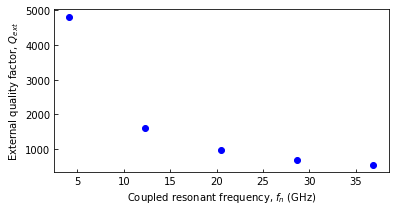

In [19]:
mCPW = CPWResonator(length                = default['length'], 
                    conductorWidth        = default['conductorWidth'], 
                    gapWidth              = default['gapWidth'], 
                    conductorThickness    = default['conductorThickness'],
                    resonatorType         = default['resonatorType'], 
                    conductorMaterial     = default['conductorMaterial'], 
                    substrateMaterial     = default['substrateMaterial'],
                    temperature           = default['temperature'], 
                    couplingCapacitance   = default['couplingCapacitance'], 
                    loadBoundaryCondition = default['loadBoundaryCondition'], 
                    mode                  = [1,2,3,4,5])

plt.subplots(figsize=(6,3))
plt.gca().tick_params(direction='in')
plt.plot(mCPW.uncoupledResonantFrequency()/10**9, mCPW.externalQualityFactor(method=0), 'bo', label="Main")
#plt.plot(mCPW.uncoupledResonantFrequency()/10**9, mCPW.externalQualityFactor(method=1), 'yo', label="Approx")
#plt.plot(mCPW.uncoupledResonantFrequency()/10**9, mCPW.externalQualityFactor(method=2), 'go', label="QW Ref")
plt.xlabel('Coupled resonant frequency, $f_n$ (GHz)')
plt.ylabel('External quality factor, $Q_{ext}$')
#plt.legend()
#plt.savefig('frequency-qualityFactor.pdf')